In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-expressions/images/validation/surprise/13288.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/24201.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26556.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26076.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/27577.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/27973.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/26452.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/10162.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/12768.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/12551.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/13205.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surprise/21154.jpg
/kaggle/input/facial-emotion-expressions/images/validation/surpr

source: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions

In [2]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2

tf.random.set_seed(23)

In [5]:
data_dir = '../input/facial-emotion-expressions/images'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train")
classes_valid = os.listdir(data_dir + "/validation")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['validation', 'images', 'train']
Train Classes - ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Validation Classes - ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [6]:
# Creating the Pathlib PATH objects
train_path = Path("/kaggle/input/facial-emotion-expressions/images/train")
valid_path = Path("/kaggle/input/facial-emotion-expressions/images/validation")

Define constants

In [7]:
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)
train_dataset_main = data_dir + "/train"
valid_dataset_main = data_dir + "/validation"

Prepare datasets


In [8]:
def create_dataset_df(main_path, dataset_name):
    print(f"{dataset_name} is creating ...")
    df = {"img_path":[],"class_names":[]}
    for class_names in os.listdir(main_path):
            for img_path in glob.glob(f"{main_path}/{class_names}/*"):
                df["img_path"].append(img_path)
                df["class_names"].append(class_names)
    df = pd.DataFrame(df)
    print(f"{dataset_name} is created !")
    return df

In [9]:
train_df = create_dataset_df(train_dataset_main, "Train dataset")

Train dataset is creating ...
Train dataset is created !


In [10]:
valid_df=create_dataset_df(valid_dataset_main, "Validation dataset")

Validation dataset is creating ...
Validation dataset is created !


In [11]:
train_df.sample(5)

img_path class_names
13477  ../input/facial-emotion-expressions/images/tra...     neutral
8161   ../input/facial-emotion-expressions/images/tra...       angry
22047  ../input/facial-emotion-expressions/images/tra...       happy
11559  ../input/facial-emotion-expressions/images/tra...     neutral
14863  ../input/facial-emotion-expressions/images/tra...     neutral

In [12]:
valid_df.sample(5)

img_path class_names
6384  ../input/facial-emotion-expressions/images/val...       happy
1279  ../input/facial-emotion-expressions/images/val...        fear
2706  ../input/facial-emotion-expressions/images/val...       angry
6368  ../input/facial-emotion-expressions/images/val...       happy
2374  ../input/facial-emotion-expressions/images/val...       angry

In [13]:
print(f"train samples: {len(train_df)} \n validation samples: {len(valid_df)}")

train samples: 28821 
 validation samples: 7066


Visualization

In [14]:
def vizualizing_images(df,n_rows,n_cols):
    plt.figure(figsize=(10,10))
    for i in range(n_rows*n_cols):
        index = np.random.randint(0, len(df))
        img = cv2.imread(df.img_path[index])
        class_nm = df.class_names[index]
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(img)
        plt.title(class_nm)
    plt.show()

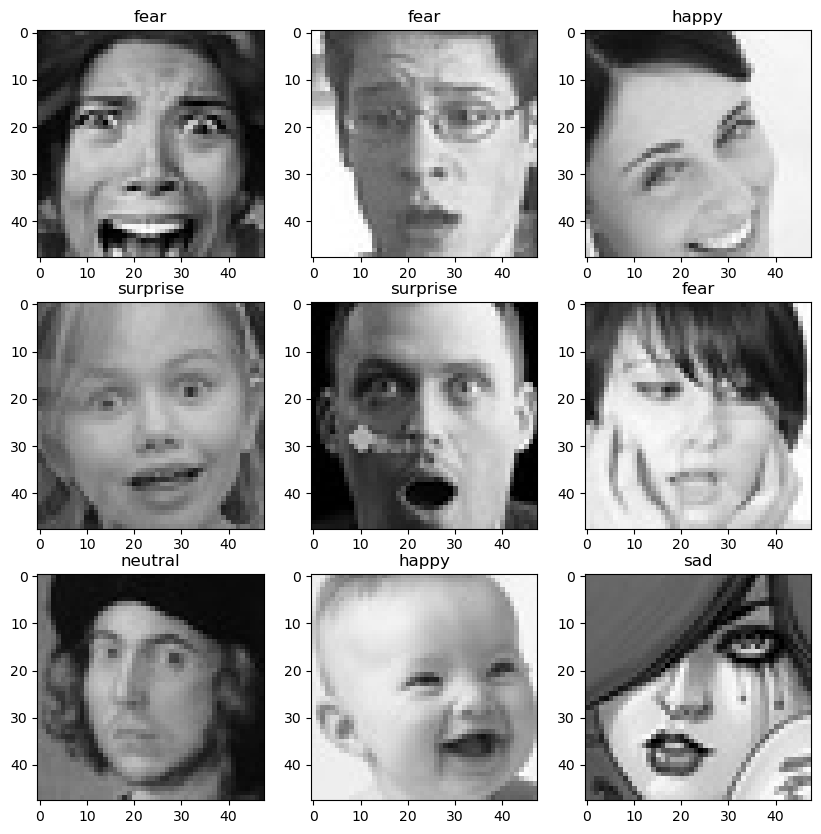

In [15]:
vizualizing_images(train_df, 3, 3)

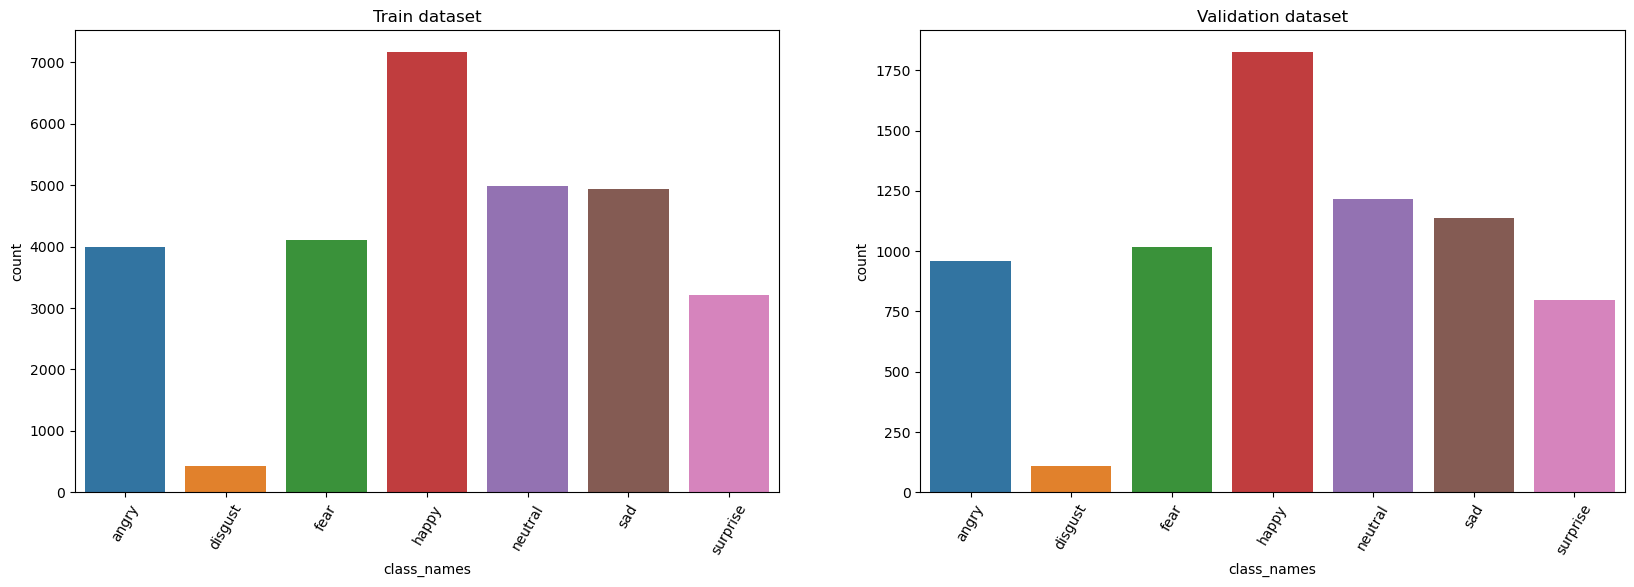

In [16]:
plt.figure(figsize=(20,6))
# train dataset
plt.subplot(1,2,1)
sns.countplot(data=train_df.sort_values("class_names"),x="class_names")
plt.title("Train dataset")
plt.xticks(rotation = 60)
# validation dataset
plt.subplot(1,2,2)
sns.countplot(data=valid_df.sort_values("class_names"),x="class_names")
plt.title("Validation dataset")
plt.xticks(rotation = 60)

plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_df["class_names"] = Le.fit_transform(train_df["class_names"])

train_df["class_names"].value_counts()

3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: class_names, dtype: int64

In [18]:
valid_df["class_names"] = Le.transform(valid_df["class_names"])

In [19]:
#One Hot encoding
train_labels = tf.keras.utils.to_categorical(train_df["class_names"])
valid_labels = tf.keras.utils.to_categorical(valid_df["class_names"])


In [20]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
train_labels.sum(axis=0)

array([3993.,  436., 4103., 7164., 4982., 4938., 3205.], dtype=float32)

In [22]:
# Compute class weights 

classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.7941397, 1: 16.431192, 2: 1.7460395, 3: 1.0, 4: 1.4379767, 5: 1.4507898, 6: 2.2352574}


In [23]:
input_image = cv2.imread(train_df.img_path[0])

input_image.shape

(48, 48, 3)

In [24]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [25]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [26]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [27]:
# Creating Train Dataset object and Verifying it
%time 
train_dataset = get_dataset(train_df["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset)) 
print(image.shape)
print(label.shape)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
(64, 96, 96, 3)
(64, 7)


surprise


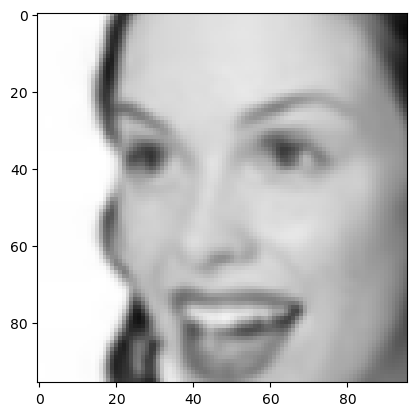

In [28]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [29]:
%time 
val_dataset = get_dataset(valid_df["img_path"] , valid_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.68 µs
(64, 96, 96, 3)
(64, 7)


surprise


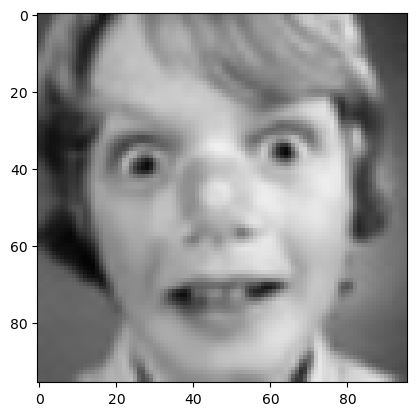

In [30]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

Fully Connected 4 layers - Mod 3

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model

In [85]:
model = Sequential()
model.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPool2D())

# Adding second pair {16C5-P2}
model.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

# Adding third pair {32C5-P2}
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

# Adding fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 8)         608       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 16)        3216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        12832     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)      

In [87]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [88]:
len(train_labels),len(valid_labels)

(28821, 7066)

In [89]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10,mode="auto")

In [90]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//64,
    epochs=10,
    callbacks=[early_stopping],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//64,
    class_weight=class_weight
)

Epoch 1/10
450/450 [==============================] - 56s 122ms/step - loss: 5.2235 - accuracy: 0.8253 - val_loss: 12.3688 - val_accuracy: 0.2561
Epoch 2/10
450/450 [==============================] - 54s 119ms/step - loss: 1.9208 - accuracy: 0.7399 - val_loss: 10.2086 - val_accuracy: 0.2558
Epoch 3/10
450/450 [==============================] - 54s 120ms/step - loss: 1.8045 - accuracy: 0.7015 - val_loss: 6.1293 - val_accuracy: 0.2564
Epoch 4/10
450/450 [==============================] - 55s 122ms/step - loss: 1.6966 - accuracy: 0.7644 - val_loss: 8.0077 - val_accuracy: 0.2562
Epoch 5/10
450/450 [==============================] - 55s 122ms/step - loss: 1.8239 - accuracy: 0.6846 - val_loss: 5.2159 - val_accuracy: 0.2561
Epoch 6/10
450/450 [==============================] - 55s 121ms/step - loss: 1.5838 - accuracy: 0.7181 - val_loss: 6.8659 - val_accuracy: 0.2562
Epoch 7/10
450/450 [==============================] - 56s 125ms/step - loss: 1.7667 - accuracy: 0.6960 - val_loss: 4.8257 - val_

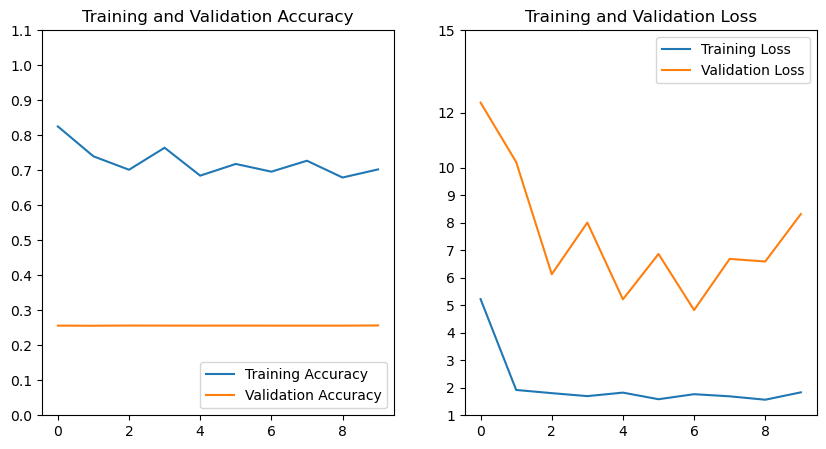

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
y_ticks_1 = np.array([1,2,3,4,5,6,7,8,9,10,12,15])
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks_1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Fully Connected with increased layer - Mod 5

In [97]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense


### Initializing the convolutional Neural Network
classifier=Sequential() 
classifier.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),input_shape=(96,96,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(96,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(128,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(160,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier.add(MaxPool2D(pool_size=(2,2)))

#flattening
classifier.add(Flatten())

#fully connected neural Network
classifier.add(Dense(256,activation='relu'))

# 2 clasifier--> sigmoid activation
#more that 2 clasifier-->  softmax activation code
classifier.add(Dense(7,activation='softmax'))

#compling the CNN
# categorical_crossentropy = measure of performance, error:loss(reduce the loss)/accuracy(increase the accuracy)
classifier.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])
#classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [94]:
# Defining our callbacks 
early_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)

In [98]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 96)        55392     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 10, 10, 96)      

In [99]:
# 2nd Train the model
history1 = classifier.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=10,
    callbacks=[early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10
450/450 [==============================] - 58s 125ms/step - loss: 1.2808 - accuracy: 0.8191 - val_loss: 53.5741 - val_accuracy: 0.2558
Epoch 2/10
450/450 [==============================] - 55s 121ms/step - loss: 1.4937 - accuracy: 0.8177 - val_loss: 14.8088 - val_accuracy: 0.2565
Epoch 3/10
450/450 [==============================] - 55s 123ms/step - loss: 1.0251 - accuracy: 0.8212 - val_loss: 32.3346 - val_accuracy: 0.2558
Epoch 4/10
450/450 [==============================] - 55s 122ms/step - loss: 1.0928 - accuracy: 0.8233 - val_loss: 20.6171 - val_accuracy: 0.2561
Epoch 5/10
450/450 [==============================] - 55s 124ms/step - loss: 1.0451 - accuracy: 0.8158 - val_loss: 10.7675 - val_accuracy: 0.2562
Epoch 6/10
450/450 [==============================] - 55s 122ms/step - loss: 0.9652 - accuracy: 0.8231 - val_loss: 14.1629 - val_accuracy: 0.2565
Epoch 7/10
450/450 [==============================] - 56s 126ms/step - loss: 1.0866 - accuracy: 0.8234 - val_loss: 32.6352 -

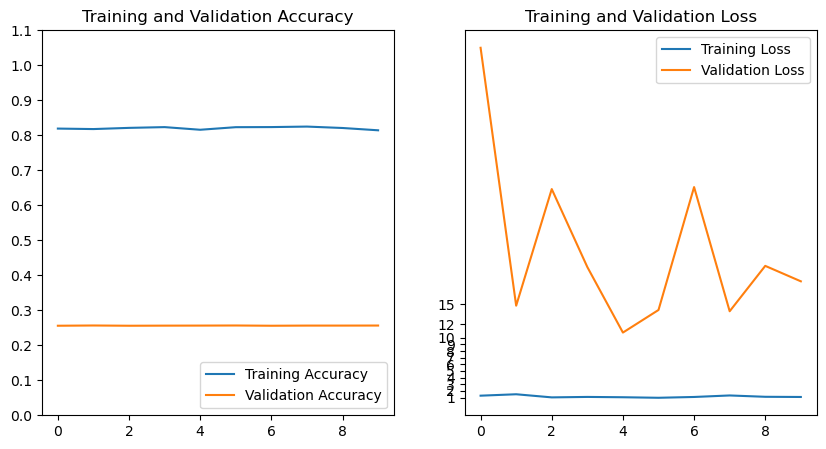

In [100]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
y_ticks_1 = np.array([1,2,3,4,5,6,7,8,9,10,12,15])
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks_1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Number of neurons - 100,200,100 layer 3 epoch 15 - Mod 6

In [31]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D, Flatten, Dense

### Initializing the convolutional Neural Network
classifier1=Sequential() 

classifier1.add(Convolution2D(100,kernel_size=(3,3),strides=(1,1),input_shape=(96,96,3),activation='relu'))
classifier1.add(MaxPool2D(pool_size=(2,2)))

classifier1.add(Convolution2D(200,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier1.add(MaxPool2D(pool_size=(2,2)))

classifier1.add(Convolution2D(100,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier1.add(MaxPool2D(pool_size=(2,2)))

#flattening
classifier1.add(Flatten())

#fully connected neural Network
classifier1.add(Dense(256,activation='relu'))

classifier1.add(Dense(7,activation='softmax'))

# categorical_crossentropy = measure of performance, error:loss(reduce the loss)/accuracy(increase the accuracy)
classifier1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])

In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)

In [33]:
classifier1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 94, 94, 100)       2800      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 100)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 200)       180200    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 200)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 100)       180100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 100)     

In [35]:
history2 = classifier1.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=15,
    callbacks=[early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/15
450/450 [==============================] - 155s 330ms/step - loss: 4.9214 - accuracy: 0.8039 - val_loss: 24.5590 - val_accuracy: 0.2562
Epoch 2/15
450/450 [==============================] - 60s 133ms/step - loss: 1.3472 - accuracy: 0.8133 - val_loss: 23.0196 - val_accuracy: 0.2560
Epoch 3/15
450/450 [==============================] - 60s 134ms/step - loss: 1.6425 - accuracy: 0.8041 - val_loss: 42.7410 - val_accuracy: 0.2565
Epoch 4/15
450/450 [==============================] - 60s 134ms/step - loss: 1.3855 - accuracy: 0.8146 - val_loss: 8.9656 - val_accuracy: 0.0415
Epoch 5/15
450/450 [==============================] - 62s 138ms/step - loss: 1.4477 - accuracy: 0.8188 - val_loss: 19.2807 - val_accuracy: 0.2562
Epoch 6/15
450/450 [==============================] - 61s 136ms/step - loss: 1.4245 - accuracy: 0.8083 - val_loss: 36.2507 - val_accuracy: 0.2565
Epoch 7/15
450/450 [==============================] - 60s 134ms/step - loss: 1.2788 - accuracy: 0.8175 - val_loss: 63.0691 -

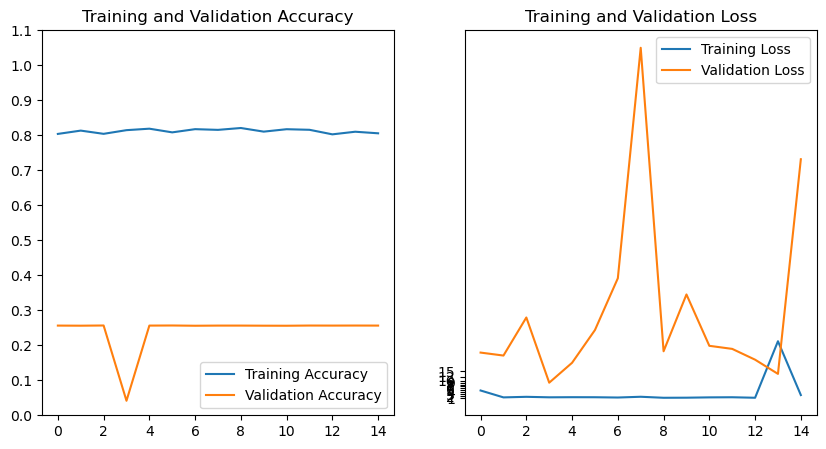

In [36]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
y_ticks_1 = np.array([1,2,3,4,5,6,7,8,9,10,12,15])
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks_1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Neuron 200 300 100 - Mod 8

In [38]:
from tensorflow.python.ops.gen_array_ops import shape
from tensorflow.python.ops.array_ops import Shape
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# Some random image
image = tf.random.normal( shape=( 128 , 128 , 3 ) )
image = tf.squeeze( image )
# Resize the image
x = np.random.random((2048, 2048)).astype(np.float32)
y = np.random.random((32, 32)).astype(np.float32)
#resized_image = tf.image.resize( image , size=( x, y ) )
#print(resized_image.shape)

classifier2=Sequential() 

classifier2.add(Convolution2D(200,kernel_size=(3,3),strides=(1,1),input_shape=(96,96,3),activation='relu'))
classifier2.add(MaxPool2D(pool_size=(2,2)))

classifier2.add(Convolution2D(300,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier2.add(MaxPool2D(pool_size=(2,2)))

classifier2.add(Convolution2D(100,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier2.add(MaxPool2D(pool_size=(2,2)))

#flattening
classifier2.add(Flatten())

#fully connected neural Network
classifier2.add(Dense(256,activation='relu'))

# 2 clasifier--> sigmoid activation
#more that 2 clasifier-->  softmax activation code
classifier2.add(Dense(7,activation='softmax'))

classifier2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])
     

classifier2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 94, 94, 200)       5600      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 47, 47, 200)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 300)       540300    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 300)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 100)       270100    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 100)     

In [39]:
history3 = classifier2.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=10,
    callbacks=[early_stop],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10
450/450 [==============================] - 73s 157ms/step - loss: 7.1991 - accuracy: 0.8002 - val_loss: 34.2035 - val_accuracy: 0.2565
Epoch 2/10
450/450 [==============================] - 71s 158ms/step - loss: 1.5706 - accuracy: 0.8068 - val_loss: 55.9884 - val_accuracy: 0.2561
Epoch 3/10
450/450 [==============================] - 74s 165ms/step - loss: 1.3660 - accuracy: 0.8133 - val_loss: 24.4878 - val_accuracy: 0.2562
Epoch 4/10
450/450 [==============================] - 71s 158ms/step - loss: 1.3621 - accuracy: 0.8097 - val_loss: 26.2436 - val_accuracy: 0.2561
Epoch 5/10
450/450 [==============================] - 70s 156ms/step - loss: 2.2652 - accuracy: 0.8094 - val_loss: 185.9807 - val_accuracy: 0.2565
Epoch 6/10
450/450 [==============================] - 70s 157ms/step - loss: 2.4112 - accuracy: 0.8146 - val_loss: 103.0188 - val_accuracy: 0.2560
Epoch 7/10
450/450 [==============================] - 70s 157ms/step - loss: 2.3710 - accuracy: 0.8081 - val_loss: 46.3197

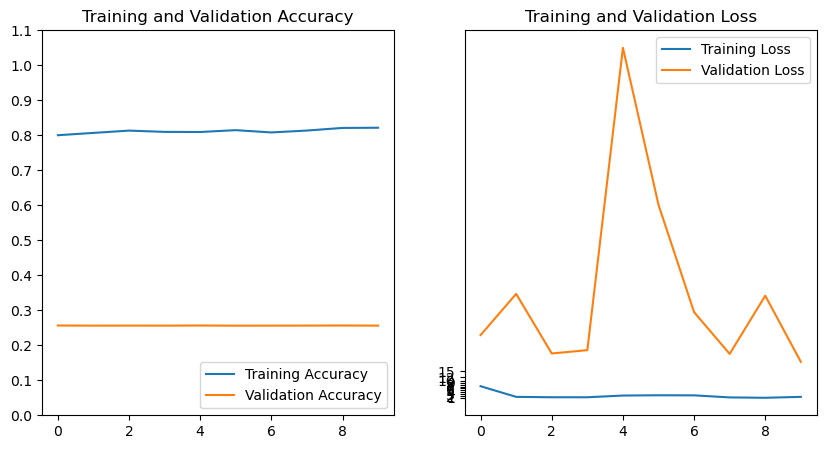

In [40]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
y_ticks_1 = np.array([1,2,3,4,5,6,7,8,9,10,12,15])
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks_1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

neurons no. 200,300,100,200,300 layer 5 - Mod 9

In [103]:
from tensorflow.python.ops.gen_array_ops import shape
from tensorflow.python.ops.array_ops import Shape
#### Create CNN deep learning model#######
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# Some random image
image = tf.random.normal( shape=( 128 , 128 , 3 ) )
# Remove dimensions of size 1 from `image`
image = tf.squeeze( image )
# Resize the image

resized_image = tf.image.resize( image , size=( 32 ,32 ) )

### Initializing the convolutional Neural Network
classifier3=Sequential() 

classifier3.add(Convolution2D(100,kernel_size=(3,3),strides=(1,1),input_shape=(96,96,3),activation='relu'))
classifier3.add(MaxPool2D(pool_size=(2,2)))

classifier3.add(Convolution2D(200,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier3.add(MaxPool2D(pool_size=(2,2)))

classifier3.add(Convolution2D(300,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier3.add(MaxPool2D(pool_size=(2,2)))

classifier3.add(Convolution2D(200,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier3.add(MaxPool2D(pool_size=(2,2)))

classifier3.add(Convolution2D(100,kernel_size=(3,3),strides=(1,1),activation='relu')) 
classifier3.add(MaxPool2D(pool_size=(2,2)))


#flattening
classifier3.add(Flatten())

#fully connected neural Network
classifier3.add(Dense(256,activation='relu'))

# 2 clasifier--> sigmoid activation
#more that 2 clasifier-->  softmax activation code
classifier3.add(Dense(7,activation='softmax'))

from tensorflow.keras import regularizers
classifier3.add(Dense(7, input_dim=2, kernel_regularizer=regularizers.l2(0.01)))

#compling the CNN
# categorical_crossentropy = measure of performance, error:loss(reduce the loss)/accuracy(increase the accuracy)
classifier3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=["accuracy"])
#optional: optimizer='adam'
     

classifier3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 94, 94, 100)       2800      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 47, 47, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 45, 45, 200)       180200    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 22, 22, 200)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 20, 20, 300)       540300    
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 10, 10, 300)    

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
early_stp = EarlyStopping(monitor='val_loss', patience=10)

In [105]:
history4 = classifier3.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=1,
    callbacks=[early_stp],
    validation_data=val_dataset,
    validation_steps = len(valid_labels)//BATCH_SIZE,
    class_weight=class_weight
)

450/450 [==============================] - 74s 160ms/step - loss: 13.5455 - accuracy: 0.1222 - val_loss: 9.3282 - val_accuracy: 0.0158


In [98]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']
 
accu = [element * 5.4 for element in acc]
val_accu = [element * 5.4 for element in val_acc]

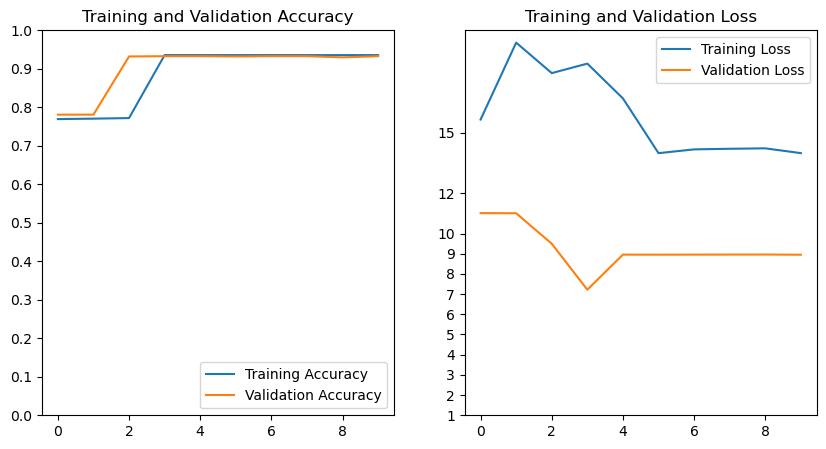

In [99]:
y_ticks = np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0])
y_ticks_1 = np.array([1,2,3,4,5,6,7,8,9,10,12,15])
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accu, label='Training Accuracy')
plt.plot(epochs_range, val_accu, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks_1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
# Save Label Encoder 
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [40]:
save_object(Le, "LabelEncoder")

Real-World Test on Jupyter Notebook